In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
import pandas as pd
# import geopandas as gpd
import urllib.request
from urllib import request
import PyPDF2
# from geotext import GeoText
import seaborn as sns
# from geopy.geocoders import Nominatim
# from geopy.exc import GeocoderTimedOut
sns.set_style('whitegrid')

In [97]:
plt.rcParams['figure.figsize'] = [16, 9]  # changing parameters for presented plots
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

In [2]:
import urllib.request
pdf_path = ""
def download_file(download_url, filename):
    response = urllib.request.urlopen(download_url)    
    file = open(filename + ".pdf", 'wb')
    file.write(response.read().decode('utf-8'))
    file.close()


In [3]:
url = "https://blogs.ubc.ca/edcp508/files/2016/02/TheLittlePrince.pdf"
def download_file(download_url, filename):
    response = urllib.request.urlopen(download_url)    
    file = open(filename + ".pdf", 'wb')
    file.write(response.read())
    file.close()
 


In [4]:
download_file(url, "little_prince")

In [5]:
# import io, requests

# # url = 'http://www.asx.com.au/asxpdf/20171108/pdf/43p1l61zf2yct8.pdf'
# response = requests.get(url)

# with io.BytesIO(response.content) as open_pdf_file:
#     pdfReader = PyPDF2.PdfFileReader(open_pdf_file)
#     num_pages = pdfReader.getNumPages()
#     print(num_pages)
#     pageObj = pdfReader.getPage(10)
 
#     # extracting text from page
#     print(pageObj.extractText())

In [6]:
file = open("little_prince.pdf", 'rb')
raw = file.read()


In [7]:
# pdfFileObj = open('example.pdf', 'rb')
 
# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(file)
 
# printing number of pages in pdf file
print(pdfReader.numPages)
 

# closing the pdf file object
# pdfFileObj.close()

64


In [8]:
# creating a page object
pageObj = pdfReader.getPage(5)
 
# extracting text from page
print(pageObj.extractText())

62  So I lived my life alone, without anyone that I could really talk to, until I had an accident with my plane in the Desert of Sahara, six years ago. Something was broken in my engine. And as I had with me neither a mechanic nor any passengers, I set myself to attempt the difficult repairs all alone. It was a question of life or death for me: I had scarcely enough drinking water to last a week.  The first night, then, I went to sleep on the sand, a thousand miles from any human habitation. I was more isolated than a shipwrecked sailor on a raft in the middle of the ocean. Thus you can imagine my amazement, at sunrise, when I was awakened by an odd little voice. It said:  "If you please--draw me a sheep!"  "What!"  "Draw me a sheep!"  I jumped to my feet, completely thunderstruck. I blinked my eyes hard. I looked carefully all around me. And I saw a most extraordinary small person, who stood there examining me with great seriousness. Here you may see the best portrait that, later, I w

In [9]:
text = pdfReader.getPage(5).extractText()
# text.replace("'s ", " is ")
text

'62  So I lived my life alone, without anyone that I could really talk to, until I had an accident with my plane in the Desert of Sahara, six years ago. Something was broken in my engine. And as I had with me neither a mechanic nor any passengers, I set myself to attempt the difficult repairs all alone. It was a question of life or death for me: I had scarcely enough drinking water to last a week.  The first night, then, I went to sleep on the sand, a thousand miles from any human habitation. I was more isolated than a shipwrecked sailor on a raft in the middle of the ocean. Thus you can imagine my amazement, at sunrise, when I was awakened by an odd little voice. It said:  "If you please--draw me a sheep!"  "What!"  "Draw me a sheep!"  I jumped to my feet, completely thunderstruck. I blinked my eyes hard. I looked carefully all around me. And I saw a most extraordinary small person, who stood there examining me with great seriousness. Here you may see the best portrait that, later, I 

In [163]:
numPages = pdfReader.numPages
book = []
for numPage in range(3, 63):
    book.append(pdfReader.getPage(numPage).extractText())

In [164]:
tempBook = {}
for num, Page in enumerate(book):
    tempBook[num+1] = Page


In [165]:
book[-1]

'63 This is, to me, the loveliest and saddest landscape in the world. It is the same as that on the preceding page, but I have drawn it again to impress it on your memory. It is here that the little prince appeared on Earth, and disappeared.  Look at it carefully so that you will be sure to recognize it in case you travel some day to the African desert. And, if you should come upon this spot, please do not hurry on. Wait for a time, exactly under the star. Then, if a little man appears who laughs, who has golden hair and who refuses to answer questions, you will know who he is. If this should happen, please comfort me. Send me word that he has come back.           '

In [166]:
from nltk.tokenize import RegexpTokenizer,word_tokenize,sent_tokenize

In [173]:
book[43]

'47 "Please--tame me!" he said.  "I want to, very much," the little prince replied. "But I have not much time. I have friends to discover, and a great many things to understand."  "One only understands the things that one tames," said the fox. "Men have no more time to understand anything. They buy things all ready made at the shops. But there is no shop anywhere where one can buy friendship, and so men have no friends any more. If you want a friend, tame me . . ."  "What must I do, to tame you?" asked the little prince.  "You must be very patient," replied the fox. "First you will sit down at a little distance from me--like that--in the grass. I shall look at you out of the corner of my eye, and you will say nothing. Words are the source of misunderstandings. But you will sit a little closer to me, every day . . ."  The next day the little prince came back.  "It would have been better to come back at the same hour," said the fox. "If, for example, you come at four o\'clock in the afte

In [212]:
for page in book:
    temp = re.findall(r'\d{2,4}\s+\w*\W+',page) 
    if temp:
        print(page[:10])

41  Once w
62  So I l
93  It too
114  I had
135  As ea
14 Now the
15 Perhaps
166  Oh, l
177  On th
198  I soo
229  I bel
23 10  He 
2711  The 
2912  The 
3013  The 
3314  The 
34"It is n
3515  The 
3816  So t
3917  When
4218  The 
43 19  Aft
4420  But 
4521  It w
47 "Please
4922  "Goo
5023  "Goo
5124  It w
5325  "Men
5626  Besi
57 I dropp
6227  And 
63 This is


In [ ]:
for page in book:
    temp = re.findall(r'\d{2,4}\s\s\w+',page) #lista
    if temp:
        print(page[:10])

In [ ]:
chapters = {}
for page in book:
    

In [145]:
book[12][:100] 

'166  Oh, little prince! Bit by bit I came to understand the secrets of your sad little life . . . Fo'

In [15]:
# separated_text2 = word_tokenize(text)
# separated_text2[:10]

In [16]:
# pdfFileObject = open("Test.pdf", 'rb')
 
# pdfReader = PyPDF2.PdfFileReader(pdfFileObject)
 
# print(" No. Of Pages :", pdfReader.numPages)
 
# pageObject = pdfReader.getPage(0)
 
# print(pageObject.extractText())
 
# # pdfFileObject.close()

In [17]:
#  url = "http://www.kkoworld.com/kitablar/Frans_Kafka_Mehkeme-ing.pdf"
# response = request.urlopen(url)
# raw = response.read()

# Deleting stop words. There is need to clean all pages. 

In [18]:
len(book)

61

In [19]:
Tokenizer = RegexpTokenizer(r"\w+[A-Za-z0-9-]+") #\w+|\$[\d\.]+|\S+

In [53]:
# aby usunąć numer strony potrzebne będą regexy
newBook = []
for page in book:
#     del(page)
    newPage = Tokenizer.tokenize(page)
#     newBook.append(' '.join(newPage))
    newBook.append(newPage)

In [21]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words("english")

In [22]:
cleanBook = []
for separatedPage in newBook:
    separated_text_cleaned = [word for word in separatedPage if word.lower() not in eng_stopwords]
    cleanBook.append(separated_text_cleaned)

# Looking for noun phrases

In [23]:
from textblob import TextBlob

In [85]:
plainPages = []
for page in newBook:
    plainPages.append(" ".join(page))

In [86]:
cleanPages = []
for page in cleanBook:
    cleanPages.append(" ".join(page))

In [99]:
polarityWithStopWords = {}
subjectivityWithStopWords = {}
for page, text in enumerate(plainPages):
    textBlob = TextBlob(text)
    sentiment = textBlob.sentiment
    polarityWithStopWords[page+1] = sentiment[0]
    subjectivityWithStopWords[page+1] = sentiment[1]
    
polarityWithoutStopWords = {}
subjectivityWithoutStopWords = {}
for page, text in enumerate(cleanPages):
    textBlob = TextBlob(text)
    sentiment = textBlob.sentiment
    polarityWithoutStopWords[page+1] = sentiment[0]
    subjectivityWithoutStopWords[page+1] = sentiment[1]

In [100]:
pages = list(subjectivityWithStopWords.keys())

polarityWSW = list(polarityWithStopWords.values())
polarityWOSW = list(polarityWithoutStopWords.values())

subjectivityWSW = list(subjectivityWithStopWords.values())
subjectivityWOSW = list(subjectivityWithoutStopWords.values())

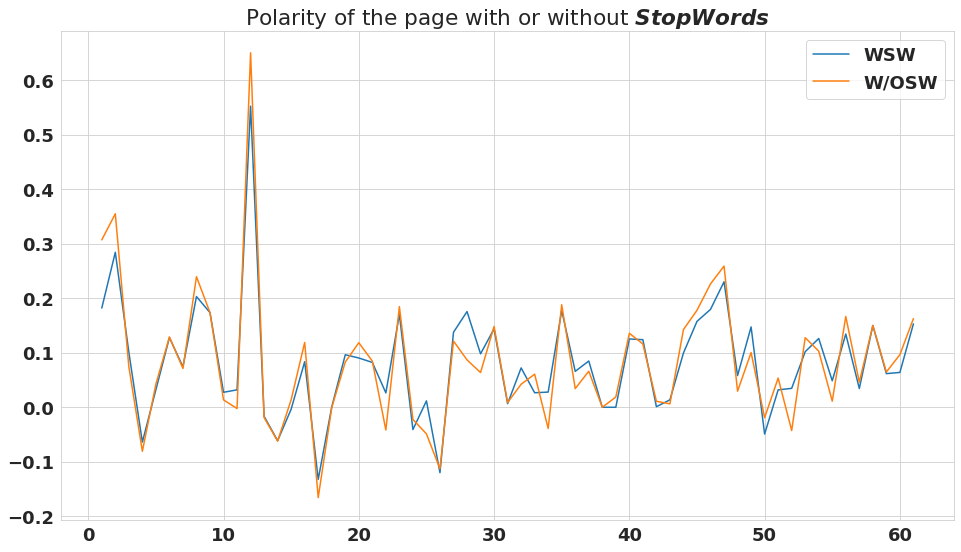

In [103]:
plt.figure(figsize=(16, 9))

plt.title("Polarity of the page with or without $Stop Words$")
plt.plot(pages, polarityWSW, label='WSW')
plt.plot(pages, polarityWOSW, label='W/OSW')
plt.legend(loc=0)

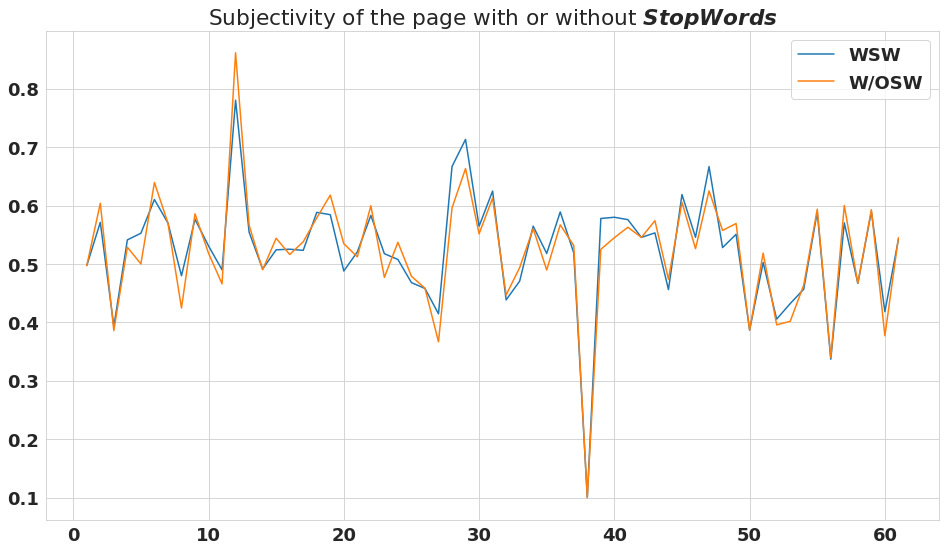

In [104]:
plt.figure(figsize=(16, 9))

plt.title("Subjectivity of the page with or without $Stop Words$")
plt.plot(pages, subjectivityWSW, label='WSW')
plt.plot(pages, subjectivityWOSW, label='W/OSW')
plt.legend(loc=0)

In [83]:
textBlob_.sentiment # analiza sentymentu powinna być zrobiona przed przed usunięciem znaków interpunkcyjnych

Sentiment(polarity=0.18194444444444444, subjectivity=0.49722222222222223)

In [105]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/izka/nltk_data...


True

In [106]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(plainPages[0])

{'neg': 0.061, 'neu': 0.825, 'pos': 0.114, 'compound': 0.8537}

## Character occurance per page

In [42]:
dictionary = {} # klucze - litery; wartości - ile razy wystapiło na stronie też słownik
for num, Page in enumerate(newBook):
    charactersSequence = "".join(Page).lower()
    characters = {}
    for character in charactersSequence:
#         print(charactersSequence)
        if character not in characters.keys():
            characters[character] = 1
        else:
            characters[character] += 1
    for char in list(characters.keys()):
        if char not in list(dictionary.keys()):
            dictionary[char]={}
            dictionary[char][num+1] = characters[char]
        else:
            dictionary[char][num+1] = characters[char]
temp_dictionary = OrderedDict(sorted(dictionary.items()))

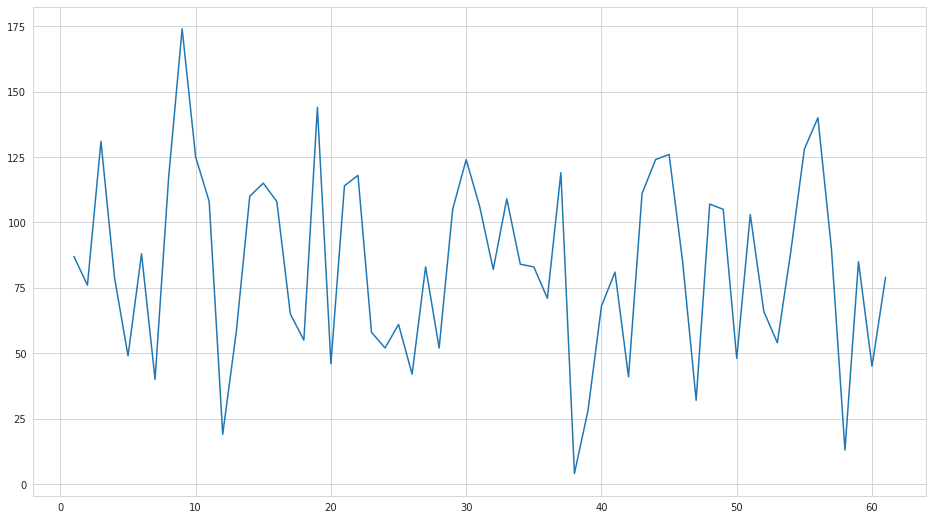

In [49]:
num_pages = list(temp_dictionary['a'].keys())
char_occur = list(temp_dictionary['a'].values())

plt.figure(figsize=(16,9))
plt.plot(num_pages, char_occur)

In [57]:
# newBook[1] # 2 strona
entireBook = []
# allwords = 0
for Page in newBook:
#     allwords += len(Page)
    entireBook += Page

In [63]:
words_occur = {}
for word in entireBook:
    temp = word.lower()
    if temp in words_occur.keys():
        words_occur[temp] += 1
    else:
        words_occur[temp] = 1

In [70]:
sortedWordsOccur = {k: v for k, v in sorted(words_occur.items(), key=lambda item: item[1], reverse=True)}

In [75]:
list(sortedWordsOccur.items())[:20]

[('the', 989),
 ('to', 468),
 ('and', 349),
 ('of', 343),
 ('that', 318),
 ('is', 303),
 ('he', 298),
 ('you', 296),
 ('it', 263),
 ('little', 260),
 ('said', 197),
 ('was', 196),
 ('prince', 186),
 ('in', 179),
 ('my', 162),
 ('not', 160),
 ('me', 152),
 ('but', 146),
 ('have', 142),
 ('are', 136)]

In [72]:
cleanSortWordsOccur = {}
for key in sortedWordsOccur.keys():
    if key not in eng_stopwords:
        cleanSortWordsOccur[key] = sortedWordsOccur[key]

In [74]:
list(cleanSortWordsOccur.items())[:20]

[('little', 260),
 ('said', 197),
 ('prince', 186),
 ('one', 130),
 ('planet', 69),
 ('would', 62),
 ('like', 57),
 ('flower', 53),
 ('good', 46),
 ('time', 45),
 ('never', 42),
 ('stars', 42),
 ('sheep', 39),
 ('made', 37),
 ('come', 37),
 ('shall', 35),
 ('much', 33),
 ('man', 33),
 ('king', 33),
 ('fox', 33)]